# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Importing my own choice
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max() + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

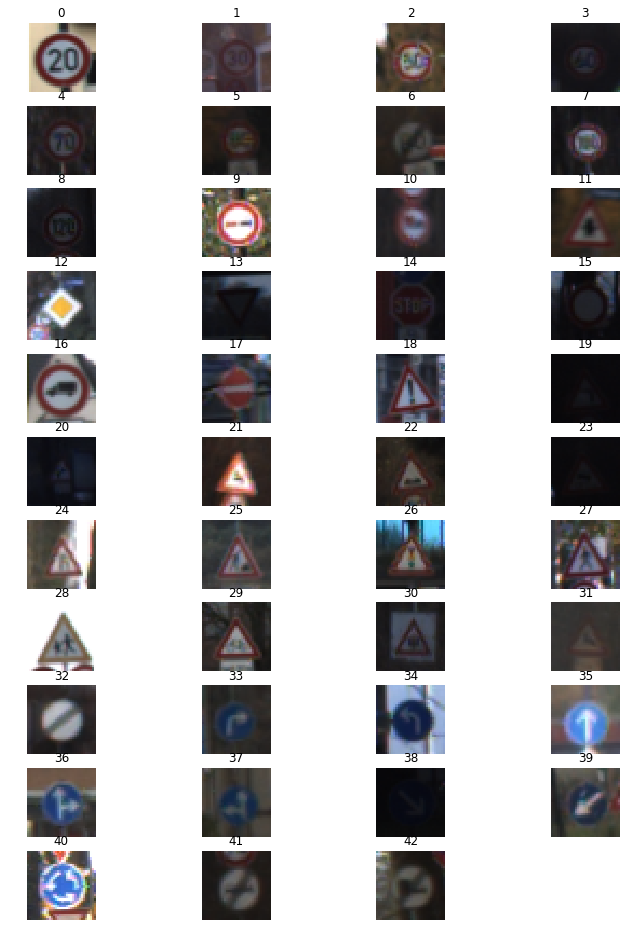

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from random import randint
# Visualizations will be shown in the notebook.
%matplotlib inline

num_of_samples=[]
plt.figure(figsize=(12, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

#### Plot number of images per class

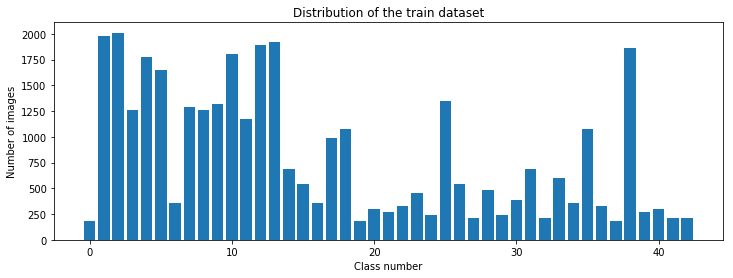

Min number of images per class = 180
Max number of images per class = 2010


In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline
#Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images per class =", min(num_of_samples))
print("Max number of images per class =", max(num_of_samples))

-------------

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### 2.1:  Preprocess the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.
#### 2.1.1: Preprocessing Function

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.


import cv2
from numpy import newaxis


# Iterates through grayscale for each image in the data
def gray_maker(data):
    gray_images = []
    for image in data:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray)
    return np.array(gray_images)


def preprocess(data,data_name,verbose):
    if verbose:
        print('Preprocessing '+ data_name + '...')
        
    # Iterate through grayscale
    data = gray_maker(data)
    data = data[..., newaxis]
    
    #Normalizes the data between 0.1 and 0.9 instead of 0 to 255 
    data = data / 255 * 0.8 + 0.1
    
    if verbose:
        print('Finished preprocessing '+ data_name + '...')
        
    # Double-check that the image is changed to depth of 1
    image_shape = data.shape
    
    if verbose:
        print('Processed '+ data_name + ' shape =', image_shape)
        print(" ")
    return data



#### 2.1.2: Preprocessing all data

In [6]:
X_train = preprocess(X_train,'train_data',verbose = True)
X_test = preprocess(X_test,'test_data',verbose = True)

Preprocessing train_data...
Finished preprocessing train_data...
Processed train_data shape = (34799, 32, 32, 1)
 
Preprocessing test_data...
Finished preprocessing test_data...
Processed test_data shape = (12630, 32, 32, 1)
 


#### 2.1.3: After Preprocessing

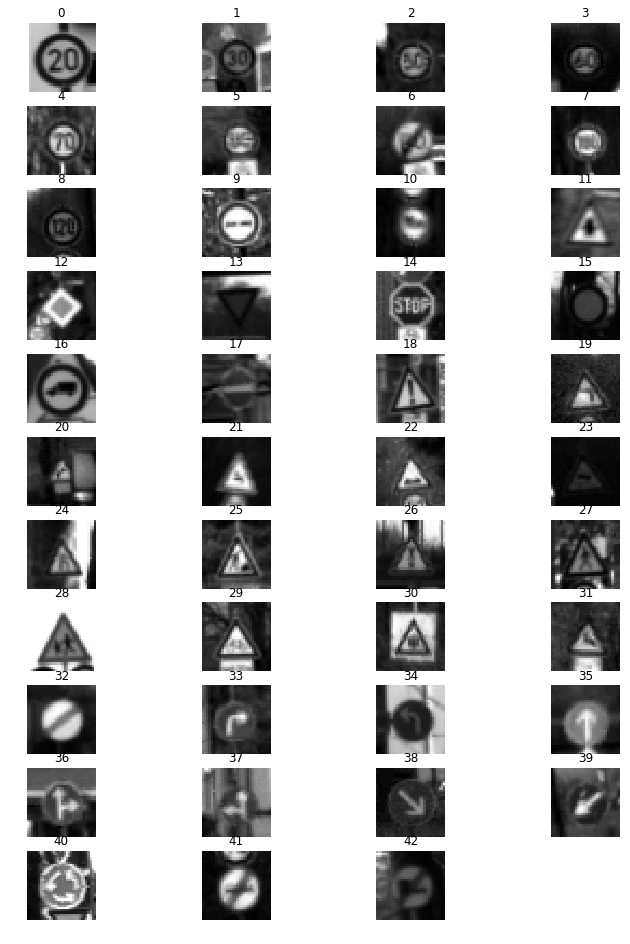

In [7]:
# Visualizations will be shown in the notebook.
%matplotlib inline

num_of_samples=[]
plt.figure(figsize=(12, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected_grey = X_train[y_train == i]
    #draw the first image of each class
    plt.imshow(x_selected_grey[0, :, :, 0], cmap = 'gray') 
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

----------

#### 2.1.4: Generate fake data 

 I will generate some additional data, then split the data in a later cell. This is to help with the issue identified in the original histogram

In [8]:
### Generate fake data 
from scipy import ndimage
import random

# min_desired below is just mean_pics but wanted to 
# make the code below easier to distinguish

def fake_data_generator(X,y,verbose):
    
    '''X = feature data , y = label data'''
    
    pics_per_class = np.bincount(y)
    mean_pics = int(np.mean(pics_per_class))
    
    if verbose:
        print('Generating new data.')

    # Angles to be used to rotate images in additional data made
    angles = [-10, 10, -15, 15, -20, 20]

    # Iterate through each class
    for i in range(len(pics_per_class)):
    
        # Check if less data than the mean
        if pics_per_class[i] < mean_pics:
        
            # Count how many additional pictures we want
            new_wanted = mean_pics - pics_per_class[i]
            picture = np.where(y == i)
            more_X = []
            more_y = []
        
            # Make the number of additional pictures needed to arrive at the mean
            for num in range(new_wanted):
            
                # Rotate images and append new ones to more_X, append the class to more_y
                more_X.append(ndimage.rotate(X[picture][random.randint(0,pics_per_class[i] - 1)],\
                                         random.choice(angles), reshape=False))
                more_y.append(i)
        
            # Append the pictures generated for each class back to the original data
            X = np.append(X, np.array(more_X), axis=0)
            y = np.append(y, np.array(more_y), axis=0)
            
    if verbose:    
        print('Additional data generated. Any classes lacking data now have',mean_pics, 'pictures.')
    return X,y

In [9]:
X_train, y_train = fake_data_generator(X_train,y_train,verbose = True)

Generating new data.
Additional data generated. Any classes lacking data now have 809 pictures.


#### 2.1.5: Histogram representing data distribution in all classes

The updated number of training examples = 46714


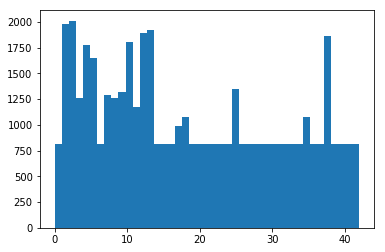

In [10]:
plt.hist(y_train, bins = n_classes)
updated_n_train = len(X_train)
print("The updated number of training examples =", updated_n_train)

####  Data summary

In [11]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Extra data generated =",n_train-34799)

Number of training examples = 46714
Number of testing examples = 12630
Extra data generated = 11915


#### Splitting Train and Validation data

In [12]:
from sklearn.model_selection import train_test_split
# shuffleing data
X_train, y_train = shuffle(X_train, y_train)
        
# For each epoch, there are separate training data and validation data
X_train, X_valid, y_train, y_valid\
                        = train_test_split(X_train, y_train,\
                                    stratify = y_train,\
                                    test_size=0.1,\
                                    random_state=23)
    
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)

Number of training examples = 42042
Number of validation examples = 4672


----------

### 2.2 : Model Architecture

#### 2.2.1: Neural Network Function

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


# The below is only necessary to reset if the notebook has not been shutdown
tf.reset_default_graph()

from tensorflow.contrib.layers import flatten

def neuralNetwork(x): 
    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    
    
    #==============================================================
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Weight and bias
    # If not using grayscale, the third number in shape would be 3
    c1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6),\
                                                mean = mu,\
                                                stddev = sigma))
    c1_bias = tf.Variable(tf.zeros(6))
    # Apply convolution
    conv_layer1 = tf.nn.conv2d(x, c1_weight,\
                               strides=[1, 1, 1, 1],\
                               padding='VALID')\
                               + c1_bias
    # Activation for layer 1
    conv_layer1 = tf.nn.relu(conv_layer1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer1 = tf.nn.avg_pool(conv_layer1,\
                                 ksize=[1, 2, 2, 1],\
                                 strides=[1, 2, 2, 1],\
                                 padding='VALID')
    
    
    
    #================================================================
    # Layer 2: Convolutional. Output = 10x10x16.
    # Note: The second layer is implemented the exact same as layer one, 
    # with layer 1 as input instead of x And then of course changing the
    #numbers to fit the desired ouput of 10x10x16 Weight and bias
    c2_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16),\
                                                mean = mu,\
                                                stddev = sigma))
    c2_bias = tf.Variable(tf.zeros(16))
    # Apply convolution for layer 2
    conv_layer2 = tf.nn.conv2d(conv_layer1, c2_weight,\
                               strides=[1, 1, 1, 1],\
                               padding='VALID') + c2_bias
    # Activation for layer 2
    conv_layer2 = tf.nn.relu(conv_layer2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2 = tf.nn.avg_pool(conv_layer2,\
                                 ksize=[1, 2, 2, 1],\
                                 strides=[1, 2, 2, 1],\
                                 padding='VALID')
    # Flatten to get to fully connected layers. Input = 5x5x16. Output = 400.
    flat = tf.contrib.layers.flatten(conv_layer2)
    
    
    
    
    #===============================================================
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    # Although this is fully connected, the weights and biases still are implemented similarly
    # There is no filter this time, so shape only takes input and output
    # Weight and bias
    fc1_weight = tf.Variable(tf.truncated_normal(shape = (400, 200),\
                                                 mean = mu,\
                                                 stddev = sigma))
    fc1_bias = tf.Variable(tf.zeros(200))
    # Here is the main change versus a convolutional layer - matrix multiplication instead of 2D convolution
    fc1 = tf.matmul(flat, fc1_weight) + fc1_bias
    # Activation for the first fully connected layer.
    # Same thing as before
    fc1 = tf.nn.relu(fc1)
    # Dropout, to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)

    
    
    #==================================================================
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # Same as the fc1 layer, just with updated output numbers
    fc2_weight = tf.Variable(tf.truncated_normal(shape = (200, 100),\
                                                 mean = mu,\
                                                 stddev = sigma))
    fc2_bias = tf.Variable(tf.zeros(100))
    # Again, matrix multiplication
    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias
    # Activation.
    fc2 = tf.nn.relu(fc2)
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    
    
    #========================================================
    # Layer 5 Fully Connected. Input = 84. Output = 43.
    # Since this is the final layer, output needs to match up with the number of classes
    fc3_weight = tf.Variable(tf.truncated_normal(shape = (100, 43),\
                                                 mean = mu, \
                                                 stddev = sigma))
    fc3_bias = tf.Variable(tf.zeros(43))
    # Again, matrix multiplication
    logits = tf.matmul(fc2, fc3_weight) + fc3_bias

    return logits


#### 2.2.2: Create Placeholders

In [14]:
# Set placeholder variables for x, y, and the keep_prob for dropout
# Also, one-hot encode y
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

#### 2.2.3: Pipeline

In [15]:
rate = 0.001

# loss functions, and optimizer
logits = neuralNetwork(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


#### 2.2.4: Helper functions for train, validate and test 

In [16]:
# The below is used in the validation part of the neural network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


### 2.3:  Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


EPOCHS = 20
BATCH_SIZE = 160

save_file = 'train_model.ckpt'
saver = tf.train.Saver()



with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        
        # shuffleing data
        X_train, y_train = shuffle(X_train, y_train)
        
            
        # run session in each bach of data in a epoch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            loss = sess.run(training_operation, feed_dict={x: batch_x,\
                                                           y: batch_y,\
                                                           keep_prob : 0.7})
            
        # calculate validation accuracy once all batches are done in a epoch    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        
        
        
    # Save the model
    saver.save(sess, save_file)
    print('Trained Model Saved.')


Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Validation Accuracy = 0.701

EPOCH 2 ...
Validation Accuracy = 0.831

EPOCH 3 ...
Validation Accuracy = 0.877

EPOCH 4 ...
Validation Accuracy = 0.906

EPOCH 5 ...
Validation Accuracy = 0.924

EPOCH 6 ...
Validation Accuracy = 0.934

EPOCH 7 ...
Validation Accuracy = 0.948

EPOCH 8 ...
Validation Accuracy = 0.956

EPOCH 9 ...
Validation Accuracy = 0.959

EPOCH 10 ...
Validation Accuracy = 0.970

EPOCH 11 ...
Validation Accuracy = 0.969

EPOCH 12 ...
Validation Accuracy = 0.973

EPOCH 13 ...
Validation Accuracy = 0.972

EPOCH 14 ...
Validation Accuracy = 0.975

EPOCH 15 ...
Validation Accuracy = 0.978

EPOCH 16 ...
Validation Accuracy = 0.978

EPOCH 17 ...
Validation Accuracy = 0.980

EPOCH 18 ...
Validation Accuracy = 0.977

EPOCH 19 ...
Validation Accuracy = 0.982

EPOCH 20 ...
Validation Accuracy = 0.984

Trained Model Saved.


#### Launch the model on the test data,train data and validation data

In [18]:
# Remove the previous weights and bias
#tf.reset_default_graph()

# Launch the model on the test data
with tf.Session() as sess:
    saver.restore(sess, './train_model.ckpt')

    test_accuracy = sess.run(accuracy_operation,\
                             feed_dict={x: X_test,\
                                        y: y_test,\
                                        keep_prob : 1.0})

print('Test Accuracy: {}'.format(test_accuracy))

Test Accuracy: 0.9122723937034607


In [19]:
# Remove the previous weights and bias
#tf.reset_default_graph()

# Launch the model on the test data
with tf.Session() as sess:
    saver.restore(sess, './train_model.ckpt')

    train_accuracy = sess.run(accuracy_operation,\
                             feed_dict={x:X_train,\
                                        y: y_train,\
                                        keep_prob : 1.0})

print('Train Accuracy: {}'.format(train_accuracy))

Train Accuracy: 0.9920793771743774


In [20]:
# Remove the previous weights and bias
#tf.reset_default_graph()

# Launch the model on the test data
with tf.Session() as sess:
    saver.restore(sess, './train_model.ckpt')

    valid_accuracy = sess.run(accuracy_operation,\
                             feed_dict={x: X_valid,\
                                        y: y_valid,\
                                        keep_prob : 1.0})

print('validation Accuracy: {}'.format(valid_accuracy))

validation Accuracy: 0.9841609597206116


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### 3.1: Load and Output the Images

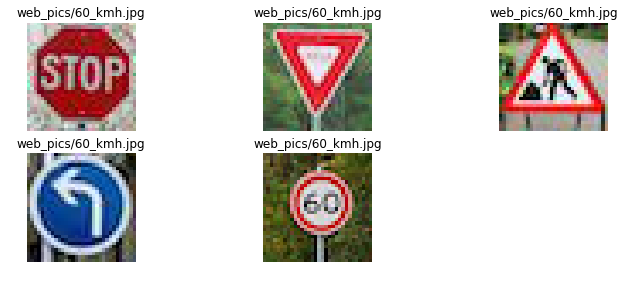

In [21]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Importing the images, and let's take a look at what we have!
import os
import matplotlib.image as mpimg

web_pics = os.listdir("./web_pics/")
# Show the images, add to a list to process for classifying
web_pics_data = []
for i in web_pics:
    # Drop the mac's created '.DS_Store' file
    if i!= '.DS_Store':
        i = 'web_pics/' + i
        image = mpimg.imread(i)
        web_pics_data.append(image)
k=0  
plt.figure(figsize=(12,14))
for image in web_pics_data:
    plt.subplot(6, 3, k+1)
    plt.axis('off')
    plt.imshow(image)
    plt.title(i)
    k=k+1
plt.show()        

### 3.2  : Predict the Sign Type for Each Image

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Make into numpy array for processing
web_pics_data = np.array(web_pics_data)
# First, double-check the image shape to make sure it
#matches the original data's 32x32x3 size
print(web_pics_data.shape)

(5, 32, 32, 3)


#### 3.2.1: Preprocess the new data

In [23]:
web_pics_data = preprocess(web_pics_data,'web_pics_data',verbose = True)

Preprocessing web_pics_data...
Finished preprocessing web_pics_data...
Processed web_pics_data shape = (5, 32, 32, 1)
 


#### 3.2.2: Double-check that the image is changed to depth of 1

In [24]:
new_image_shape = web_pics_data.shape
print("Processed additional web pictures shape =", new_image_shape)


Processed additional web pictures shape = (5, 32, 32, 1)


#### 3.2.3:  Prediction over new images

In [25]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
# Launch the model on the new pictures
with tf.Session() as sess:
    saver.restore(sess, './train_model.ckpt')

    new_pics_classes = sess.run(logits, feed_dict={x: web_pics_data,\
                                                   keep_prob : 1.0})

### 3.3: Analyze Performance

In [26]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(new_pics_classes, k=5, sorted=True))
    
signId = []    
for i in range(len(predicts[0])):
    print( 'predicted classes:', predicts[1][i][0])
    signId.append(predicts[1][i][0])

predicted classes: 14
predicted classes: 13
predicted classes: 18
predicted classes: 34
predicted classes: 2


In [27]:
import pandas as pd
sign_name = pd.read_csv('signnames.csv')
sign_name = pd.DataFrame(sign_name)

In [28]:
sign_name.columns

Index(['ClassId', 'SignName'], dtype='object')

In [29]:
sign = {}
for k in range(43):
    sign[sign_name['ClassId'][k]] =  sign_name['SignName'][k]

In [30]:
sign

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [31]:
for k in range(5):
    print (signId[k] , sign[signId[k]])
    print("================================")

14 Stop
13 Yield
18 General caution
34 Turn left ahead
2 Speed limit (50km/h)


In [32]:
ls -l ./web_pics

total 40
-rw-r--r-- 1 carnd carnd 4725 Mar 25 22:44 60_kmh.jpg
-rw-r--r-- 1 carnd carnd 4350 Mar 25 22:44 left_turn.jpeg
-rw-r--r-- 1 carnd carnd 4514 Mar 25 22:44 road_work.jpg
-rw-r--r-- 1 carnd carnd 4477 Mar 25 22:44 stop_sign.jpg
-rw-r--r-- 1 carnd carnd 4464 Mar 25 22:44 yield_sign.jpg


### 3.4:  Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [33]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(new_pics_classes, k=5, sorted=True))
    
for i in range(len(predicts[0])):
    probabilities = predicts[0][i]
    predicted_classes = predicts[1][i]
    print('Image', i,\
          'probabilities:', probabilities,\
          '\n and predicted classes:', predicts[1][i])

Image 0 probabilities: [ 12.23980713   8.32987499   5.29931879   4.51511765   1.64859486] 
 and predicted classes: [14 17 36 38 34]
Image 1 probabilities: [ 20.34670448  11.3846302    6.09567165   1.00739896   0.98556668] 
 and predicted classes: [13 35 34  9  3]
Image 2 probabilities: [ 12.05598831   9.00940228   8.62032127   6.8418088    3.65508676] 
 and predicted classes: [18 12 40 37  1]
Image 3 probabilities: [ 13.12025452   8.07227325  -0.03553319  -1.66574371  -1.75805712] 
 and predicted classes: [34 38 20 35 32]
Image 4 probabilities: [ 4.97775316  2.17866445  1.98024666  1.00796783  0.97446799] 
 and predicted classes: [ 2 10  9  5  7]


#### Predicted Result  and actual picture visualization

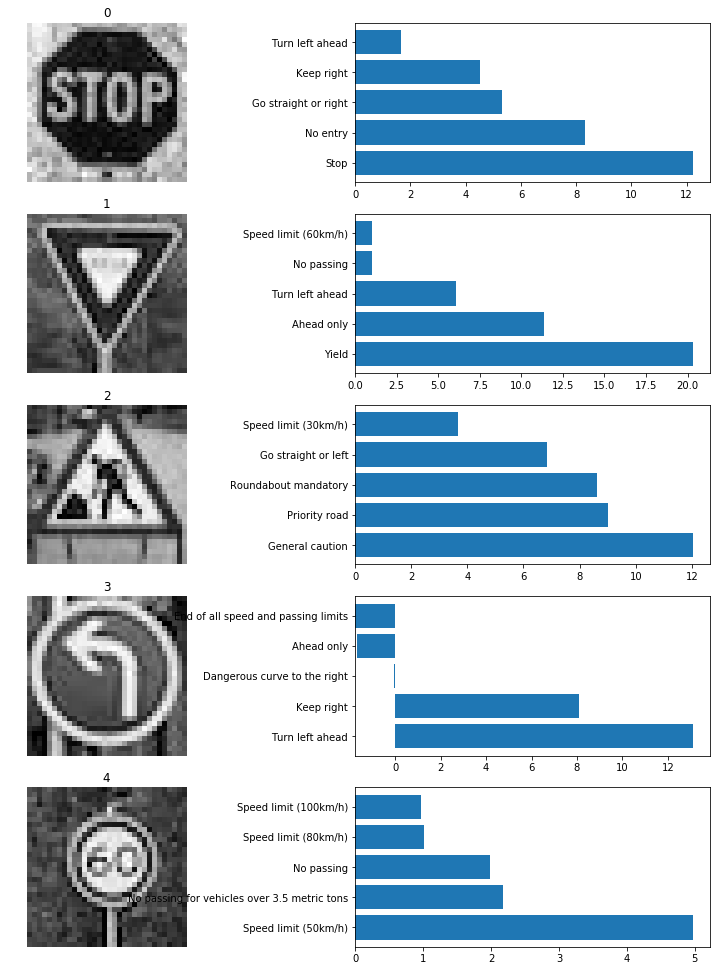

In [34]:
plt.figure(figsize=(14, 17))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(web_pics_data[i,:,:,0],cmap = 'gray') 
    plt.title(i)
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), predicts.values[i, :])
    labs1= [predicts[1][i][j] for j in range(5)]
    labs = [sign[labs1[j]] for j in range(5)]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


#### Setting Function

In [35]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps

# tf_activation: should be a tf variable name used during your 
#training procedure that represents the calculated state of a specific weight layer


# activation_min/max: can be used to view the activation contrast in more detail,
# by default matplot sets min and max to the actual min and max values of the output


# plt_num: used to plot out multiple different weight feature map sets on the same block,
#just extend the plt number for each new feature map entry



def outputFeatureMap(image_input, tf_activation,\
                     activation_min=-1, activation_max=-1 ,plt_num=1):
    
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble 
    #accessing the variable from inside a function
    
    activation = tf_activation.eval(session=tf.get_default_session(),\
                                    feed_dict={x: image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    
    for featuremap in range(featuremaps):
        
        # sets the number of feature maps to show on each row and column
        plt.subplot(6,8, featuremap+1) 
        # displays the feature map number
        plt.title('FeatureMap ' + str(featuremap)) 
        
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap],\
                       interpolation="nearest",\
                       vmin =activation_min,\
                       vmax=activation_max,\
                       cmap="gray")
            
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap],\
                       interpolation="nearest",\
                       vmax=activation_max,\
                       cmap="gray")
            
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap],\
                       interpolation="nearest",\
                       vmin=activation_min,\
                       cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap],\
                       interpolation="nearest",\
                       cmap="gray")

#### Plot of visual output 

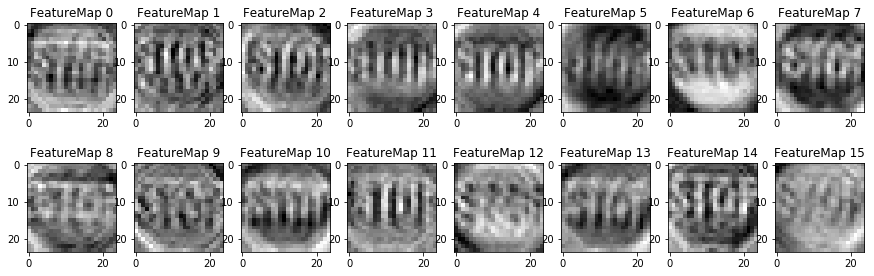

In [36]:
mu = 0
sigma = 0.1
    
    
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))    
my_image = web_pics_data[0]


'''first conv-layer'''

c1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6),\
                                            mean = mu,\
                                            stddev = sigma))
c1_bias = tf.Variable(tf.zeros(6))
conv_layer1 = tf.nn.conv2d(x, c1_weight,\
                        strides=[1, 1, 1, 1],\
                        padding='VALID', name = 'conv1')+ c1_bias

'''second conv layer'''
 
    
c2_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16),\
                                                mean = mu,\
                                                stddev = sigma))

c2_bias = tf.Variable(tf.zeros(16))
    
conv_layer2 = tf.nn.conv2d(conv_layer1, c2_weight,\
                               strides=[1, 1, 1, 1],\
                               padding='VALID', name = 'conv2') + c2_bias



with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    
    my_tensor1 = sess.graph.get_tensor_by_name('conv1:0')
    my_tensor2 = sess.graph.get_tensor_by_name('conv2:0')
    
    outputFeatureMap([my_image],my_tensor1)
    outputFeatureMap([my_image],my_tensor2)

---------

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

  Tensorflow allows us to share the variables (ex:```sess.graph.get_tensor_by_name('conv1:0')``` and it becomes possible to draw intermediate data during the training model.
            
The visual output gives us the idea of sharp edge detection and other tendencies in distribution of pixcel intensities. As the layer increases ie. becomes more and more deeper it tries to learn more hidden properties which are not obvious in the single layer. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 